<a href="https://colab.research.google.com/github/enogjyli/PPCA/blob/main/Functional_Data_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

x = np.linspace(-1, 1, 100)
def F(a, b, c, d):
  return b*np.exp(-100*(x-a/2)**2) + c*np.exp(-100*(x+a/2)**2) + 1e-1*d*np.sin(np.pi*x)

def sampler(seed):
  np.random.seed(seed)
  a, b, c, d = 2*np.random.rand(4)-1
  u = F(a, b, c, d)
  return a, u

data = {'theta':[]}
data.update({'u%d' % (i+1):[] for i in range(len(x))})

for seed in range(500):
  a, u = sampler(seed)
  data['theta'].append(a)
  for i in range(len(x)):
    data['u%d' % (i+1)].append(u[i])

data = pd.DataFrame(data)

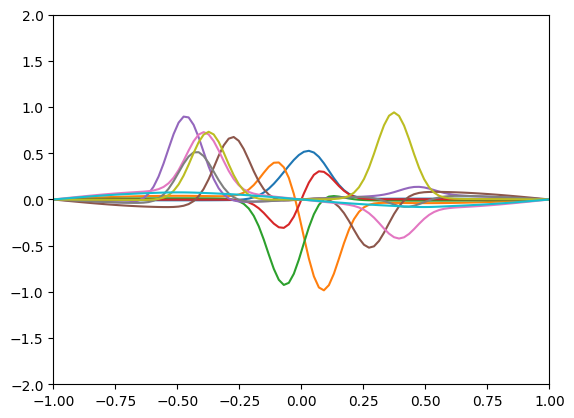

In [3]:
import matplotlib.pyplot as plt
for j in range(10):
  plt.plot(x, data.iloc[j, 1:])
plt.axis([-1, 1, -2, 2])
plt.show()

In [4]:
xdata = data.values[:,1:]
thetadata = data['theta'].values
bins = np.linspace(-1, 1, 5)
m = 3

In [5]:
from methods import GuptaPPCA
gupta = GuptaPPCA(bins, m)

In [6]:
gupta.fit(thetadata, xdata, maxiter = 1)

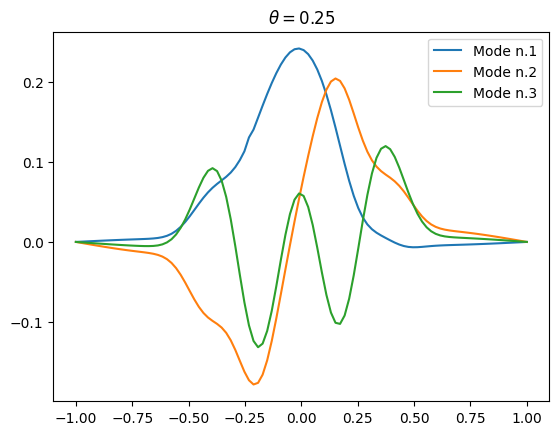

In [7]:
theta = 0.25
P = gupta.predict(theta)
for j in range(m):
  plt.plot(x, P[:,j], label = 'Mode n.%d' % (j+1))
plt.title("$\\theta = %.2f$" % theta)
plt.legend()
plt.show()